In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r"C:\Users\Khush\Downloads\NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [6]:
data.head(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


correlation

In [8]:
data.drop('Newspaper',axis=1).corr()


,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


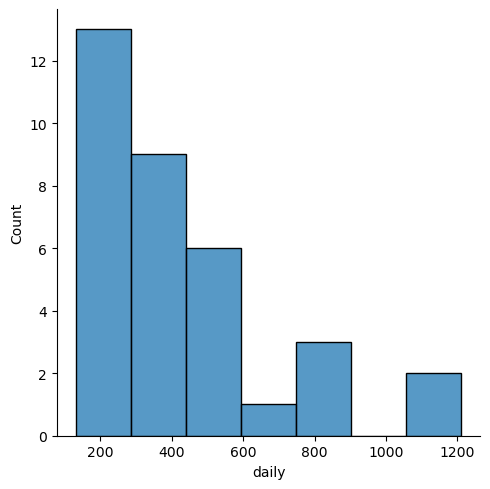

In [9]:
import seaborn as sns
sns.displot(data['daily'])

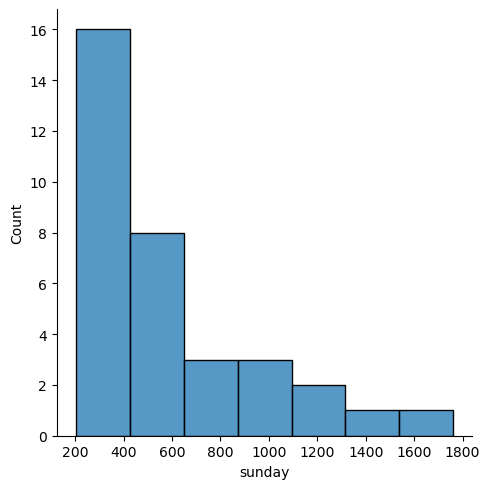

In [10]:
sns.displot(data['sunday'])

In [11]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

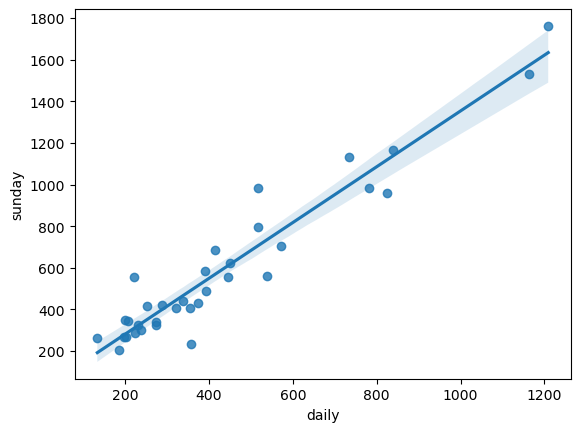

In [12]:
sns.regplot(x="daily",y="sunday",data=data);

In [13]:
#coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [26]:
print(model.tvalues, '\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [30]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

Predict for new data point

In [35]:
#predict for 200 and 300 daily circulation
import pandas as pd

newdata = pd.Series([200, 300])
print(newdata)


0    200
1    300
dtype: int64


In [46]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300


In [48]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

In [53]:
import pandas as pd

data = pd.Series({
    683: "2nd Sunday",
    1085: "3rd Sunday"
})

print(data)


683     2nd Sunday
1085    3rd Sunday
dtype: object
